In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
sns.set()

In [3]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(0, len(x),1) / len(x)
    return x, y

In [4]:
def plot_histogram_train_test(feature, bins=100):
    # train and test histogram
    plt.figure(figsize=(20, 3))
    plt.subplot(1,2,1)
    plt.title('Train distribution')
    plt.xlabel(feature)
    plt.hist(train_df[feature], bins=bins)
    plt.subplot(1,2,2)
    plt.hist(test_df[feature], bins=bins)
    plt.title('Test distribution')
    plt.xlabel(feature)
    
def plot_kde_train_test(feature):
    # train and test kde
    plt.figure(figsize=(20, 3))
    plt.subplot(1,2,1)
    plt.title('Train distribution')
    plt.xlabel(feature)
    sns.kdeplot(train_df[feature])
    plt.subplot(1,2,2)
    sns.kdeplot(test_df[feature])
    plt.title('Test distribution')
    plt.xlabel(feature)
    
def plot_ecdf_train_test(feature):
    # train and test ecdf
    plt.figure(figsize=(20, 3))
    plt.subplot(1,2,1)
    plt.title('Train distribution')
    plt.xlabel(feature)
    plt.scatter(*ecdf(train_df[feature]))
    plt.subplot(1,2,2)
    plt.scatter(*ecdf(test_df[feature]))
    plt.title('Test distribution')
    plt.xlabel(feature)
    
def count_plot_train_test(feature):
    # train and test countplot
    plt.figure(figsize=(20, 3))
    plt.subplot(1,2,1)
    plt.title('Train distribution')
    plt.xlabel(feature)
    sns.countplot(train_df[feature])
    plt.subplot(1,2,2)
    sns.countplot(test_df[feature])
    plt.title('Test distribution')
    plt.xlabel(feature)
    
def checknull(feature):
    print('Portion of null values in train and test respectively:', 
          train_df[feature].isnull().mean(), ',', 
          test_df[feature].isnull().mean())

# 1. EDA

In [5]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [9]:
print('Number of columns in dataset:', len(train_df.columns))
print('Including 1 target columns: SalePrice')

Number of columns in dataset: 81
Including 1 target columns: SalePrice


In [10]:
# drop columns having null value > 30%
null_thresh = 0.3

is_nan_train = train_df.isnull().mean()
dropped_cols_train = is_nan_train[is_nan_train > null_thresh].index
is_nan_test = test_df.isnull().mean()
dropped_cols_test = is_nan_test[is_nan_test > null_thresh].index

print('Columns having null value > '+str(null_thresh),'in train_df:',dropped_cols_train)
print('Columns having null value > '+str(null_thresh),'in test_df:',dropped_cols_test)
# print('\nPortion of null of these columns in test_df:\n', test_df[dropped_cols].isnull().mean())
# train_df.drop(dropped_cols, axis=1, inplace=True)

Columns having null value > 0.3 in train_df: Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
Columns having null value > 0.3 in test_df: Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


- So we decide to drop ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] from both train and test set

In [11]:
train_df.drop(dropped_cols_train, axis=1, inplace=True)
test_df.drop(dropped_cols_test, axis=1, inplace=True)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

- Choosing highly related columns with target variable

In [13]:
train_corr_matrix = train_df.corr()
valuable_cols = train_corr_matrix[np.abs(train_corr_matrix['SalePrice']) > 0.3].index
print('Columns having correlation with SalePrice > 0.3: ', valuable_cols.values)
train_df = train_df[valuable_cols]
test_df = test_df[valuable_cols[:-1]]

Columns having correlation with SalePrice > 0.3:  ['LotFrontage' 'OverallQual' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea'
 'BsmtFinSF1' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'FullBath'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt' 'GarageCars' 'GarageArea'
 'WoodDeckSF' 'OpenPorchSF' 'SalePrice']


In [14]:
train_corr_matrix[np.abs(train_corr_matrix['SalePrice']) > 0.55].index

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

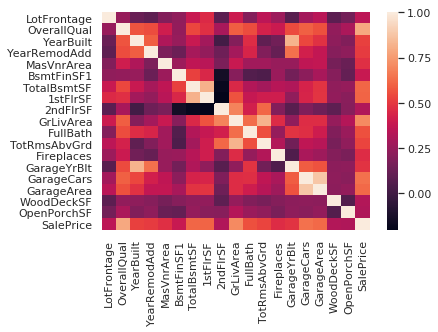

In [15]:
sns.heatmap(train_df.corr())

In [16]:
train_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


## 1.1. LotFrontage:
- Linear feet of street connected to property

In [17]:
train_df.LotFrontage.dtype

dtype('float64')

In [18]:
print('Portion of null values in train and test respectively:', train_df.LotFrontage.isnull().mean(), ',', test_df.LotFrontage.isnull().mean())

Portion of null values in train and test respectively: 0.1773972602739726 , 0.15558601782042494


/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 0, 'LotFrontage')

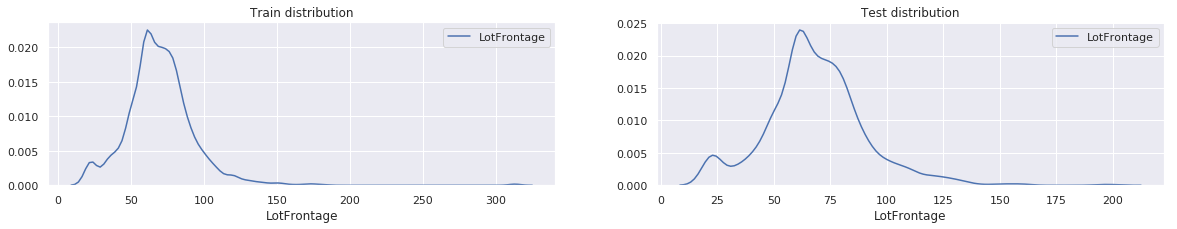

In [19]:
# train and test LotFrontage distribution
plt.figure(figsize=(20, 3))
plt.subplot(1,2,1)
plt.title('Train distribution')
plt.xlabel('LotFrontage')
sns.kdeplot(train_df['LotFrontage'])
plt.subplot(1,2,2)
sns.kdeplot(test_df['LotFrontage'])
plt.title('Test distribution')
plt.xlabel('LotFrontage')

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'LotFrontage')

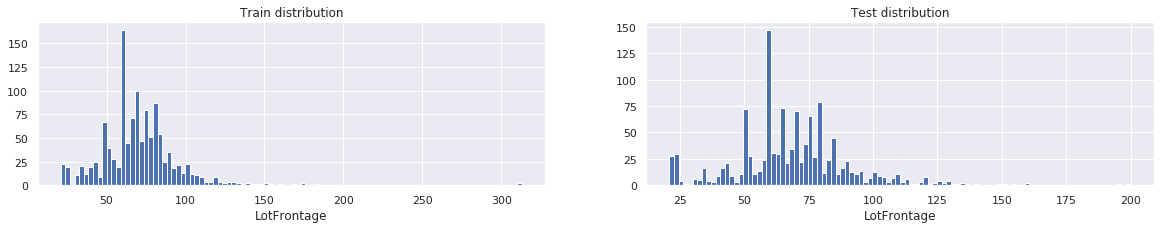

In [20]:
# train and test LotFrontage histogram
plt.figure(figsize=(20, 3))
plt.subplot(1,2,1)
plt.title('Train distribution')
plt.xlabel('LotFrontage')
plt.hist(train_df['LotFrontage'], bins=100)
plt.subplot(1,2,2)
plt.hist(test_df['LotFrontage'], bins=100)
plt.title('Test distribution')
plt.xlabel('LotFrontage')

Text(0.5, 0, 'LotFrontage')

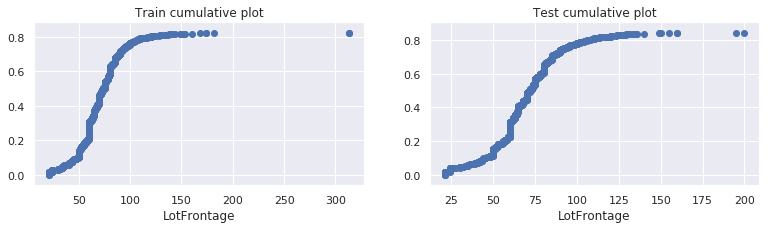

In [21]:
# train and test LotFrontage histogram
plt.figure(figsize=(13, 3))

plt.subplot(1,2,1)
plt.scatter(*ecdf(train_df['LotFrontage']))
plt.title('Train cumulative plot')
plt.xlabel('LotFrontage')

plt.subplot(1,2,2)
plt.scatter(*ecdf(test_df['LotFrontage']))
plt.title('Test cumulative plot')
plt.xlabel('LotFrontage')

- There are a few outliers

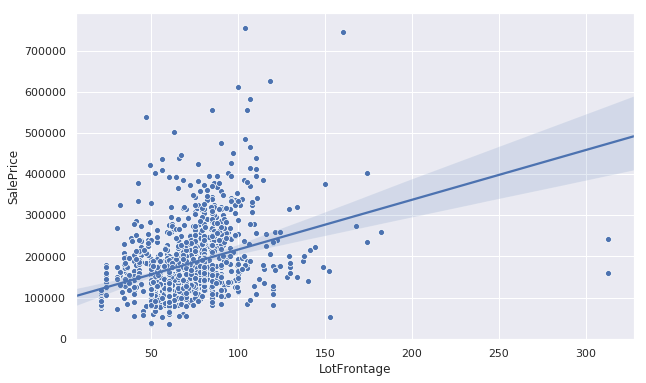

In [22]:
# fir a regression line
plt.figure(figsize=(10,6))
sns.scatterplot('LotFrontage', 'SalePrice', data=train_df)
sns.regplot('LotFrontage', 'SalePrice', data=train_df, scatter=None)

## 1.2. OverallQual:
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	

- It is an ordinal feature

In [23]:
train_df.OverallQual.dtype

dtype('int64')

In [24]:
print('Portion of null values in train and test respectively:', train_df.OverallQual.isnull().mean(), ',', test_df.OverallQual.isnull().mean())

Portion of null values in train and test respectively: 0.0 , 0.0


Text(0.5, 1.0, 'Value count of each OverallQual type on train set')

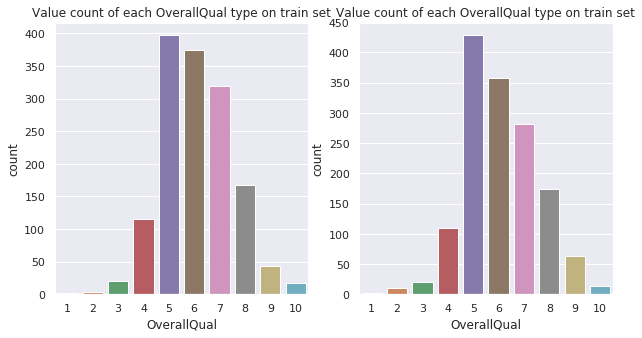

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.countplot(train_df.OverallQual)
plt.title('Value count of each OverallQual type on train set')

plt.subplot(1,2,2)
sns.countplot(test_df.OverallQual)
plt.title('Value count of each OverallQual type on train set')

In [26]:
train_df.groupby('OverallQual').mean()['SalePrice']

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

- We see the correlation between OverallQual with SalePrice on average of each quality types (1->10)

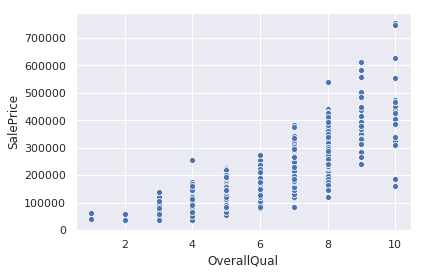

In [27]:
sns.scatterplot('OverallQual', 'SalePrice', data=train_df)

## 1.3. Year built:
- Original construction date


In [28]:
train_df.YearBuilt.dtype

dtype('int64')

In [29]:
print('Portion of null values in train and test respectively:', train_df.YearBuilt.isnull().mean(), ',', test_df.YearBuilt.isnull().mean())

Portion of null values in train and test respectively: 0.0 , 0.0


In [30]:
np.sort(test_df.YearBuilt.unique())

array([1879, 1880, 1890, 1895, 1896, 1900, 1901, 1902, 1905, 1907, 1910,
       1912, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935,
       1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [31]:
np.sort(train_df.YearBuilt.unique())

array([1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904,
       1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010])

Text(0.5, 0, 'YearBuilt')

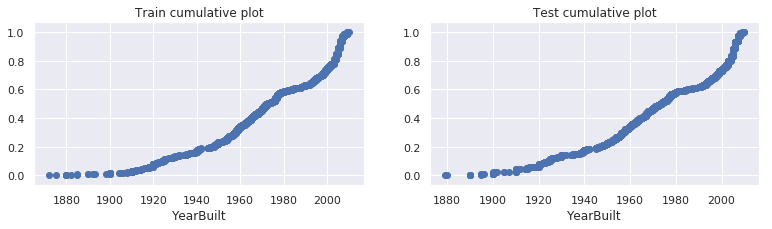

In [32]:
# train and test histogram
plt.figure(figsize=(13, 3))

plt.subplot(1,2,1)
plt.scatter(*ecdf(train_df.YearBuilt))
plt.title('Train cumulative plot')
plt.xlabel('YearBuilt')

plt.subplot(1,2,2)
plt.scatter(*ecdf(test_df.YearBuilt))
plt.title('Test cumulative plot')
plt.xlabel('YearBuilt')

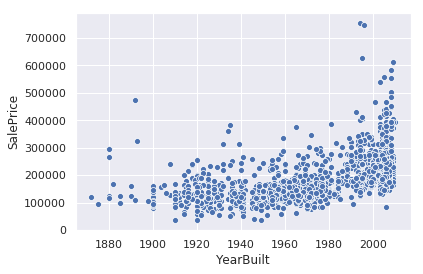

In [33]:
sns.scatterplot('YearBuilt', 'SalePrice', data=train_df)

## 1.4. YearRemodAdd:
- Remodel date (same as construction date if no remodeling or additions)

In [34]:
train_df.YearRemodAdd.dtype

dtype('int64')

In [35]:
print('Portion of null values in train and test respectively:', train_df.YearRemodAdd.isnull().mean(), ',', test_df.YearRemodAdd.isnull().mean())

Portion of null values in train and test respectively: 0.0 , 0.0


Text(0.5, 0, 'YearRemodAdd')

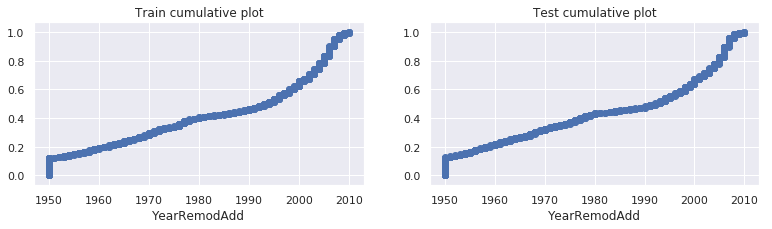

In [36]:
# train and test histogram
plt.figure(figsize=(13, 3))

plt.subplot(1,2,1)
plt.scatter(*ecdf(train_df.YearRemodAdd))
plt.title('Train cumulative plot')
plt.xlabel('YearRemodAdd')

plt.subplot(1,2,2)
plt.scatter(*ecdf(test_df.YearRemodAdd))
plt.title('Test cumulative plot')
plt.xlabel('YearRemodAdd')

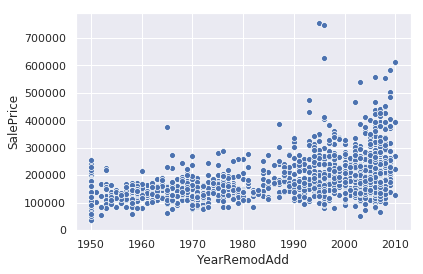

In [37]:
sns.scatterplot('YearRemodAdd', 'SalePrice', data=train_df)

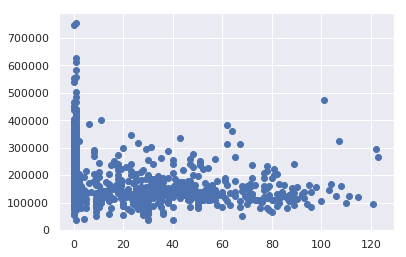

In [38]:
plt.scatter(train_df['YearRemodAdd']-train_df['YearBuilt'], train_df['SalePrice'])

## 1.5. MasVnrArea:
- Masonry veneer area in square feet

In [39]:
train_df.MasVnrArea.dtype

dtype('float64')

In [40]:
print('Portion of null values in train and test respectively:', train_df.MasVnrArea.isnull().mean(), ',', test_df.MasVnrArea.isnull().mean())

Portion of null values in train and test respectively: 0.005479452054794521 , 0.01028101439342015


Text(0.5, 0, 'MasVnrArea')

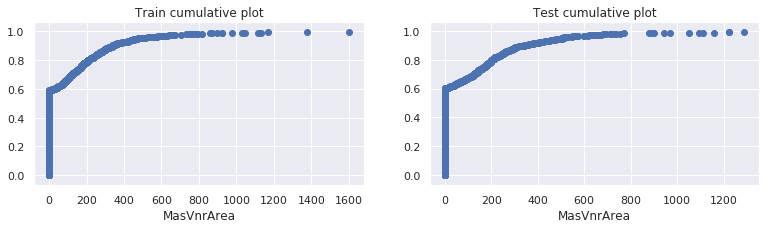

In [41]:
# train and test histogram
plt.figure(figsize=(13, 3))

plt.subplot(1,2,1)
plt.scatter(*ecdf(train_df.MasVnrArea))
plt.title('Train cumulative plot')
plt.xlabel('MasVnrArea')

plt.subplot(1,2,2)
plt.scatter(*ecdf(test_df.MasVnrArea))
plt.title('Test cumulative plot')
plt.xlabel('MasVnrArea')

Text(0.5, 0, 'MasVnrArea')

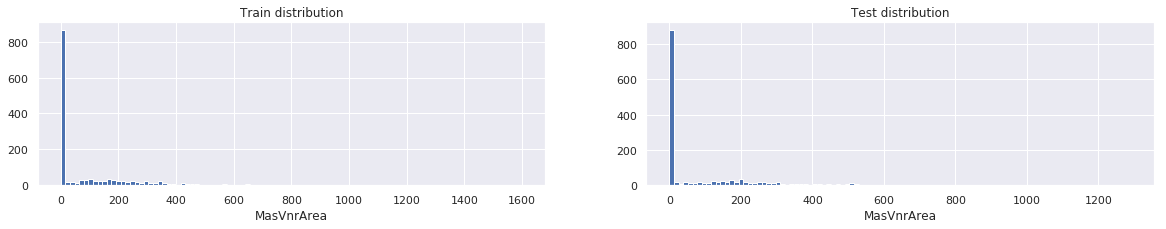

In [42]:
# train and test MasVnrArea histogram
plt.figure(figsize=(20, 3))
plt.subplot(1,2,1)
plt.title('Train distribution')
plt.xlabel('MasVnrArea')
plt.hist(train_df['MasVnrArea'], bins=100)
plt.subplot(1,2,2)
plt.hist(test_df['MasVnrArea'], bins=100)
plt.title('Test distribution')
plt.xlabel('MasVnrArea')

- About 60% MasVnrArea of train set having value exactly 0. The same observation occur

In [43]:
(train_df.MasVnrArea == 0).sum()

861

In [44]:
(test_df.MasVnrArea == 0).sum()

877

## 1.6. BsmtFinSF1:
- type 1 finished square feet

In [45]:
train_df.BsmtFinSF1.dtype

dtype('int64')

In [46]:
checknull('BsmtFinSF1')

Portion of null values in train and test respectively: 0.0 , 0.0006854009595613434


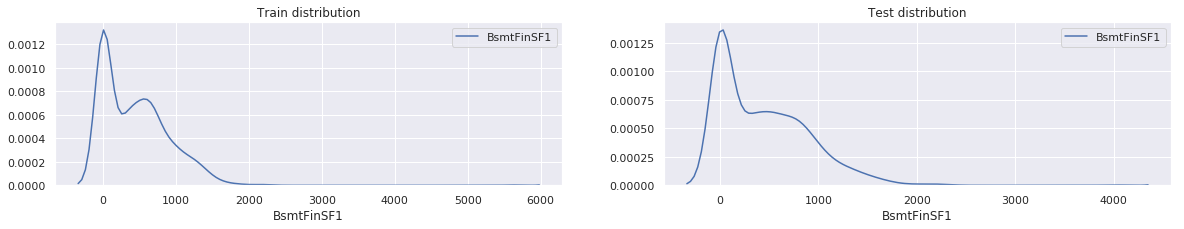

In [47]:
plot_kde_train_test('BsmtFinSF1')

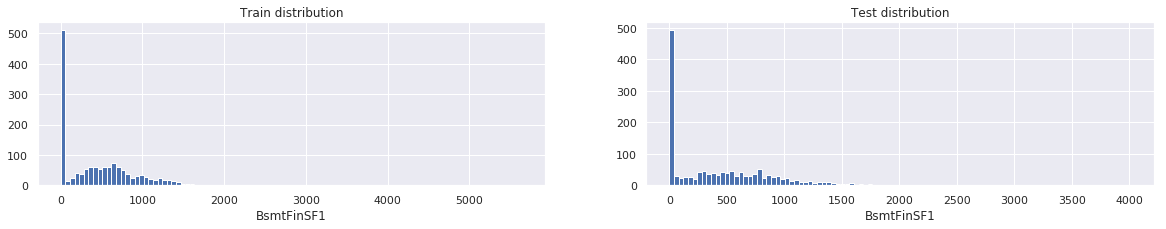

In [48]:
plot_histogram_train_test('BsmtFinSF1')

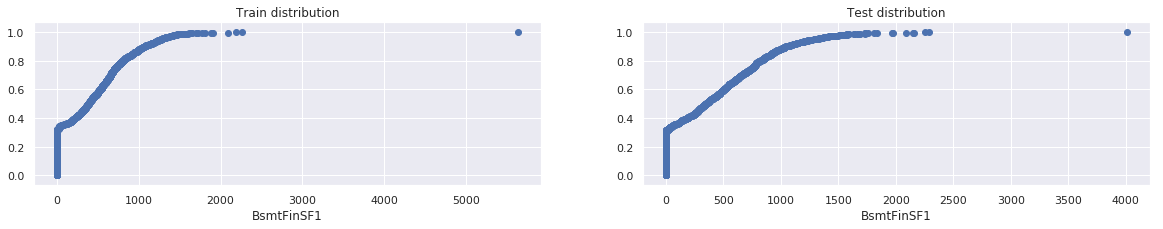

In [49]:
plot_ecdf_train_test('BsmtFinSF1')

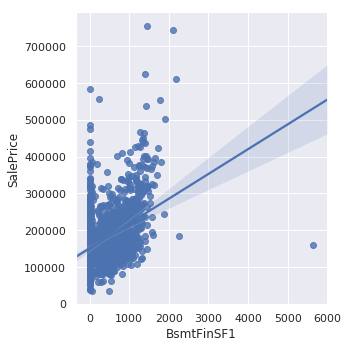

In [50]:
sns.lmplot('BsmtFinSF1', 'SalePrice', data=train_df)

## 1.7. TotalBsmtSF:
- Total square feet of basement area

In [51]:
train_df.TotalBsmtSF.dtype

dtype('int64')

In [52]:
checknull('TotalBsmtSF')

Portion of null values in train and test respectively: 0.0 , 0.0006854009595613434


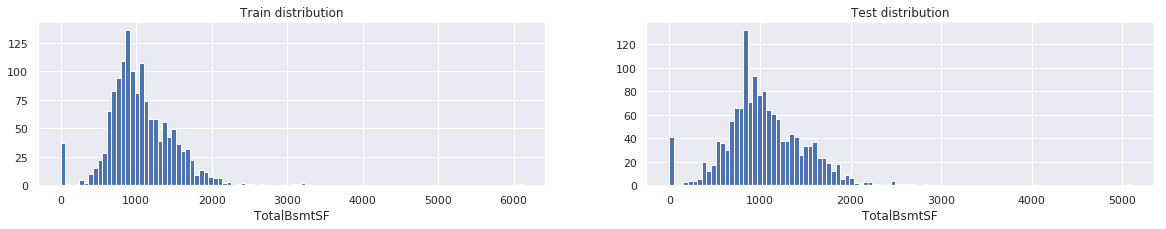

In [53]:
plot_histogram_train_test('TotalBsmtSF')

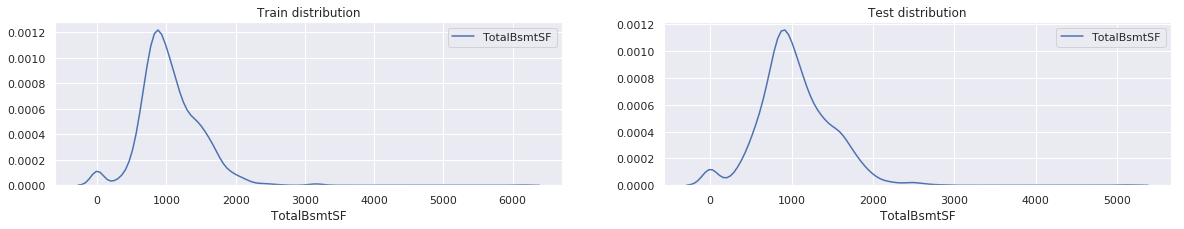

In [54]:
plot_kde_train_test('TotalBsmtSF')

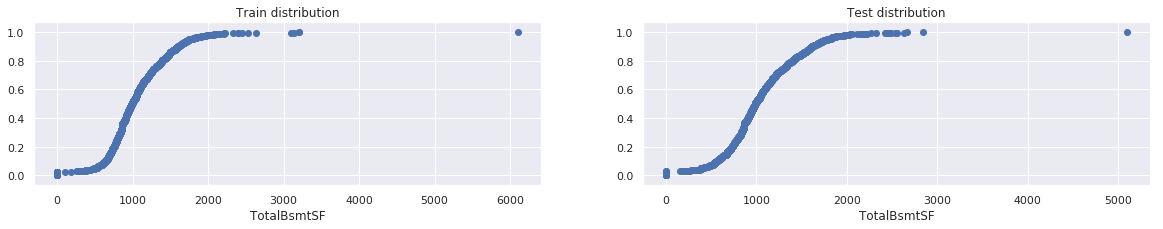

In [55]:
plot_ecdf_train_test('TotalBsmtSF')

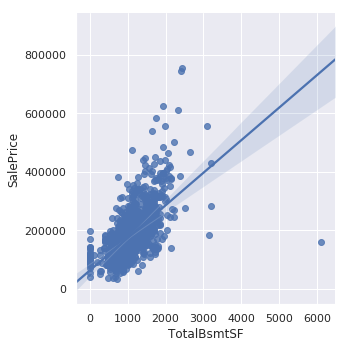

In [56]:
sns.lmplot('TotalBsmtSF', 'SalePrice', train_df)

## 1.8. 1stFlrSF:
> - First Floor square feet

In [57]:
train_df['1stFlrSF'].dtype

dtype('int64')

In [58]:
checknull('1stFlrSF')

Portion of null values in train and test respectively: 0.0 , 0.0


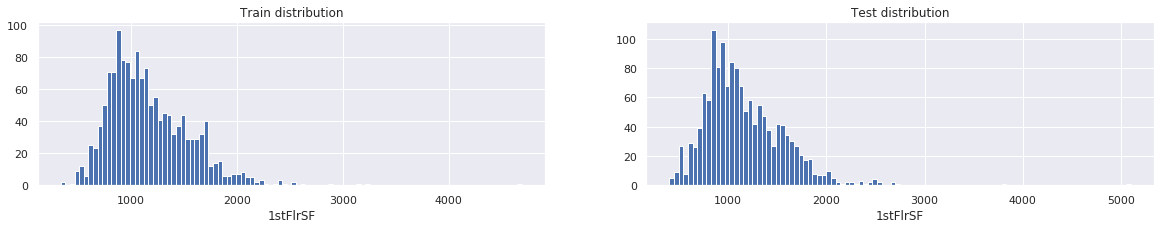

In [59]:
plot_histogram_train_test('1stFlrSF')

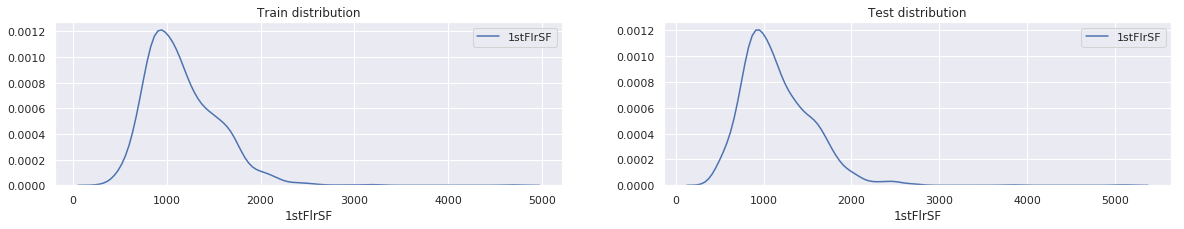

In [60]:
plot_kde_train_test('1stFlrSF')

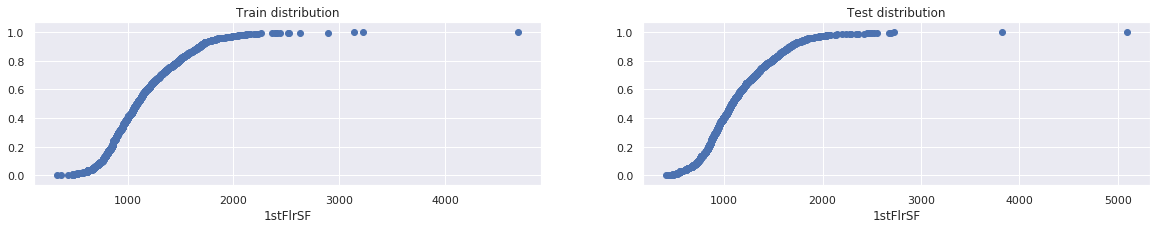

In [61]:
plot_ecdf_train_test('1stFlrSF')

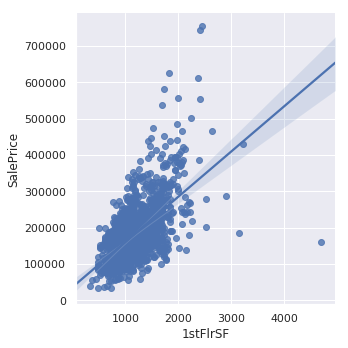

In [62]:
sns.lmplot('1stFlrSF', 'SalePrice', train_df)

## 1.9. 2ndFlrSF:
- Second floor square feet

In [63]:
train_df['2ndFlrSF'].dtype

dtype('int64')

In [64]:
checknull('2ndFlrSF')

Portion of null values in train and test respectively: 0.0 , 0.0


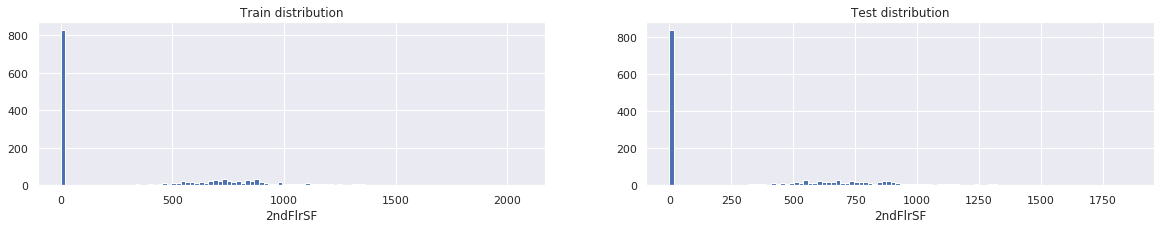

In [65]:
plot_histogram_train_test('2ndFlrSF')

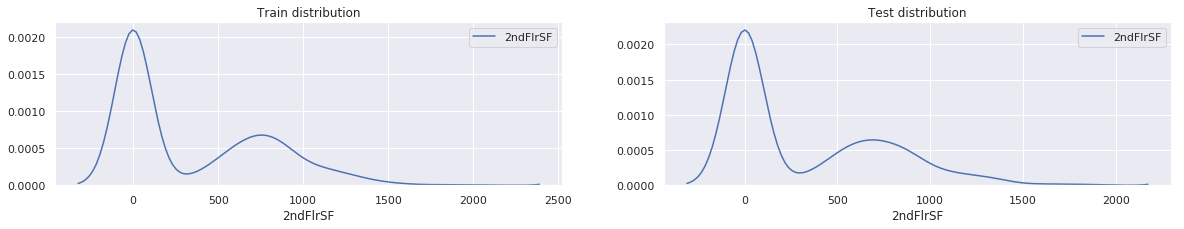

In [66]:
plot_kde_train_test('2ndFlrSF')

- 60% of both train and test set is exactly 0

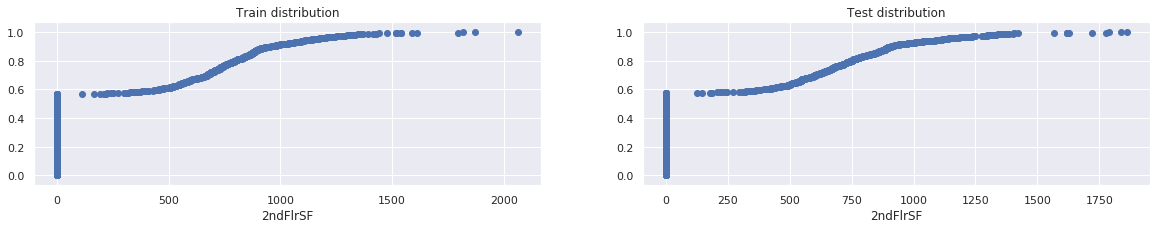

In [67]:
plot_ecdf_train_test('2ndFlrSF')

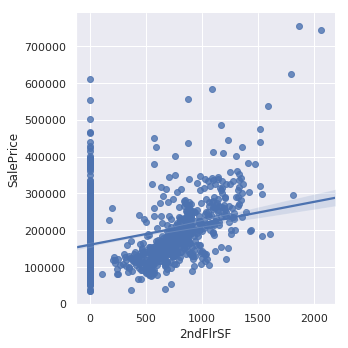

In [68]:
sns.lmplot('2ndFlrSF', 'SalePrice', train_df)

## 1.10. GrLivArea:
- Above grade (ground) living area square feet

In [69]:
train_df.GrLivArea.dtype

dtype('int64')

In [70]:
checknull('GrLivArea')

Portion of null values in train and test respectively: 0.0 , 0.0


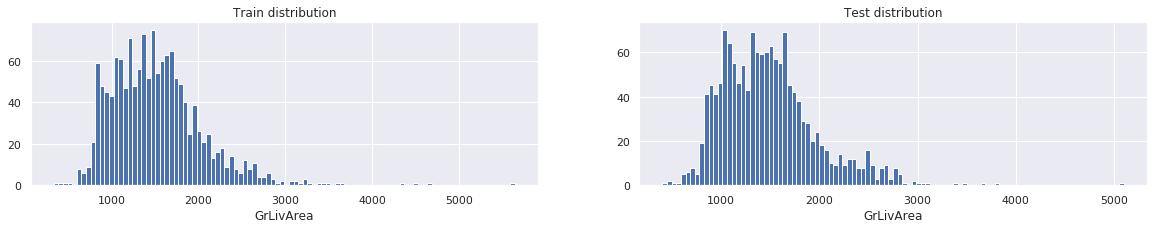

In [71]:
plot_histogram_train_test('GrLivArea')

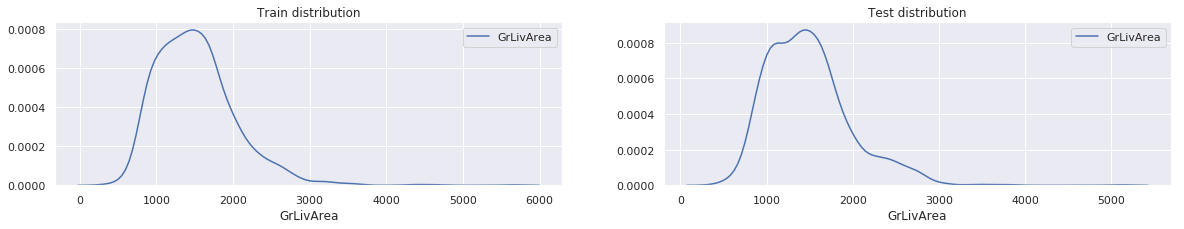

In [72]:
plot_kde_train_test('GrLivArea')

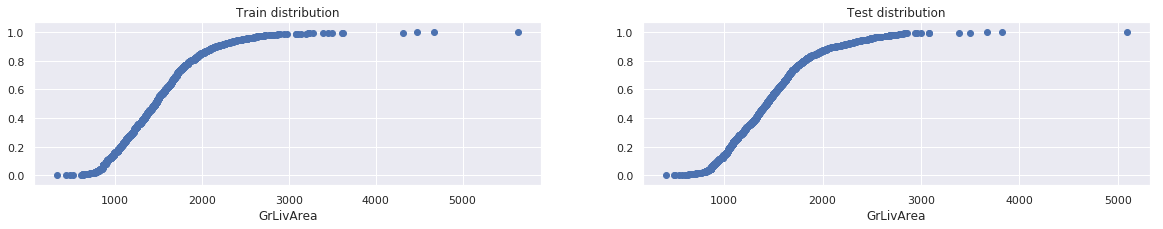

In [73]:
plot_ecdf_train_test('GrLivArea')

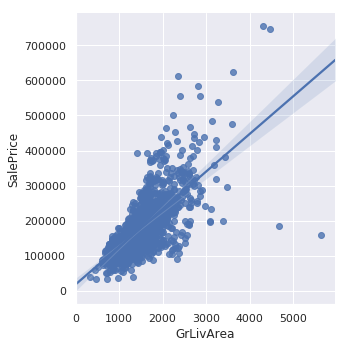

In [74]:
sns.lmplot('GrLivArea', 'SalePrice', train_df)

## 1.10. FullBath:
- Full bathrooms above grade
- An ordinal feature

In [75]:
train_df.FullBath.dtype

dtype('int64')

In [76]:
checknull('FullBath')

Portion of null values in train and test respectively: 0.0 , 0.0


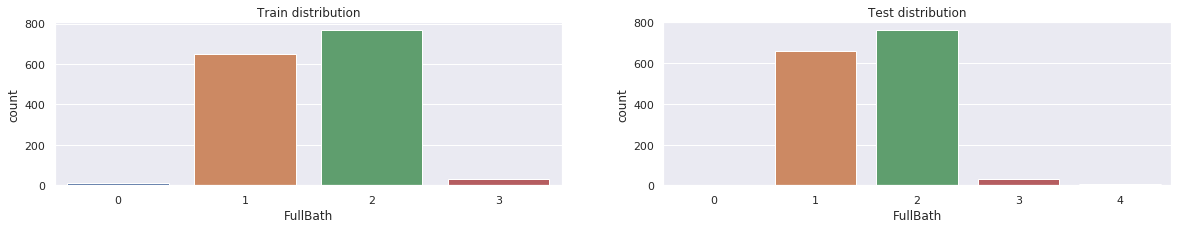

In [77]:
count_plot_train_test('FullBath')

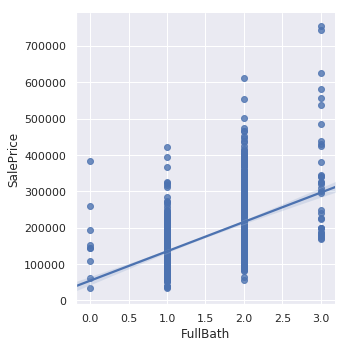

In [78]:
sns.lmplot('FullBath', 'SalePrice', train_df)

## 1.11. TotRmsAbvGrd:
- Total rooms above grade (does not include bathrooms)

In [79]:
train_df.TotRmsAbvGrd.dtype

dtype('int64')

In [80]:
train_df.TotRmsAbvGrd.unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

In [81]:
checknull('TotRmsAbvGrd')

Portion of null values in train and test respectively: 0.0 , 0.0


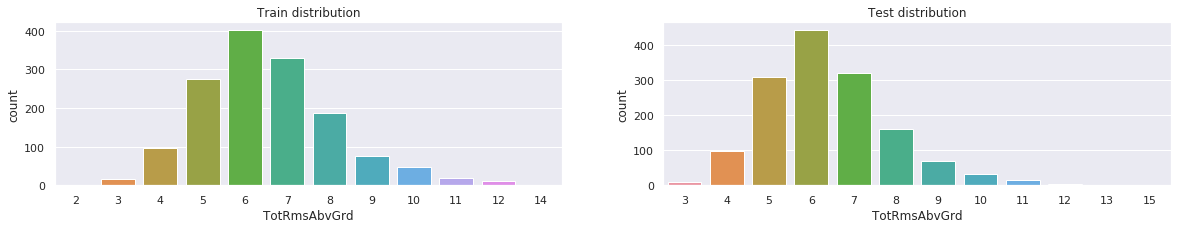

In [82]:
count_plot_train_test('TotRmsAbvGrd')

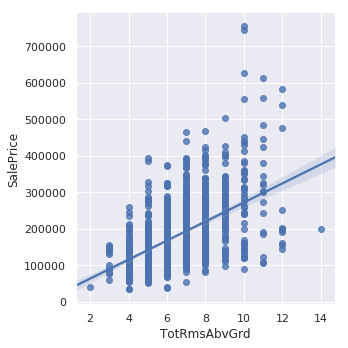

In [83]:
sns.lmplot('TotRmsAbvGrd', 'SalePrice', data=train_df)

## 1.12. Fireplaces:
- Number of fireplaces

In [84]:
train_df.Fireplaces.dtype

dtype('int64')

In [85]:
train_df.Fireplaces.unique()

array([0, 1, 2, 3])

In [86]:
checknull('Fireplaces')

Portion of null values in train and test respectively: 0.0 , 0.0


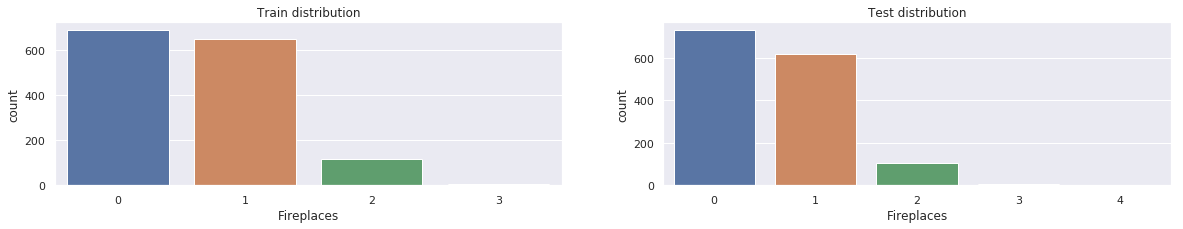

In [87]:
count_plot_train_test('Fireplaces')

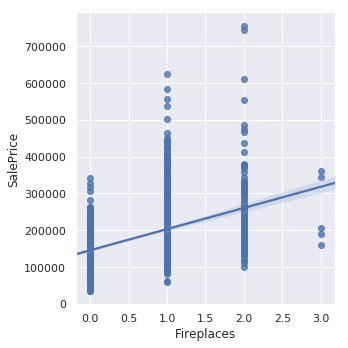

In [88]:
sns.lmplot('Fireplaces', 'SalePrice', train_df)

## 1.12. GarageYrBlt:
- Year garage was built

In [89]:
train_df.GarageYrBlt.dtype

dtype('float64')

In [90]:
train_df.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

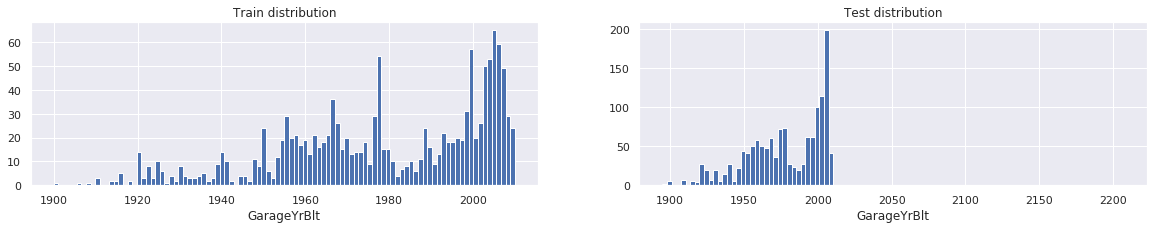

In [91]:
plot_histogram_train_test('GarageYrBlt')

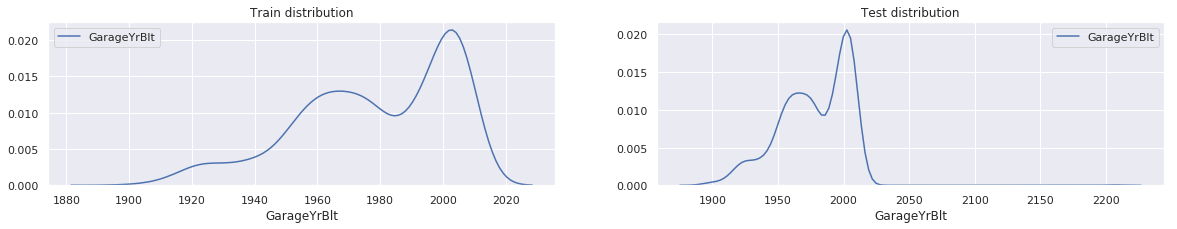

In [92]:
plot_kde_train_test('GarageYrBlt')

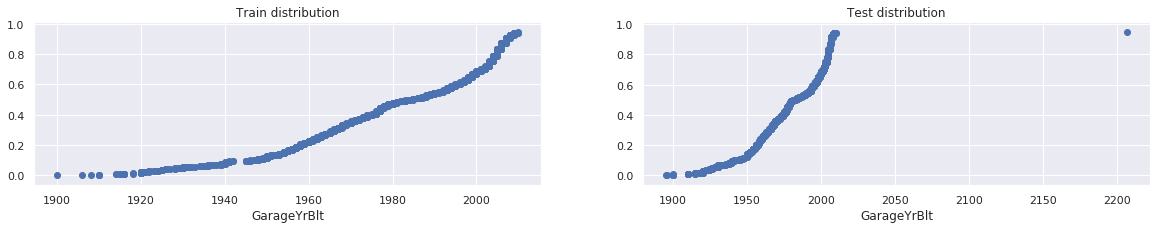

In [93]:
plot_ecdf_train_test('GarageYrBlt')

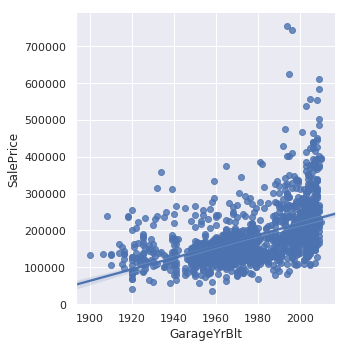

In [94]:
sns.lmplot('GarageYrBlt', 'SalePrice', train_df)

## 1.13. GarageCars:
- Size of garage in car capacity

In [95]:
train_df.GarageCars.dtype

dtype('int64')

In [96]:
train_df.GarageCars.unique()

array([2, 3, 1, 0, 4])

In [97]:
checknull('GarageCars')

Portion of null values in train and test respectively: 0.0 , 0.0006854009595613434


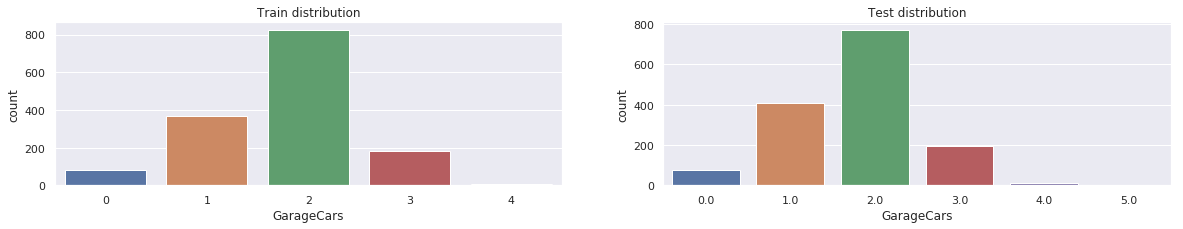

In [98]:
count_plot_train_test('GarageCars')

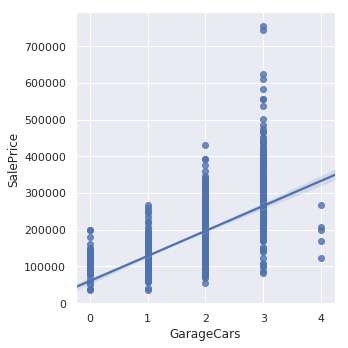

In [99]:
sns.lmplot('GarageCars', 'SalePrice', train_df)

## 1.14. GarageArea:
- Size of garage in square feet

In [100]:
train_df.GarageArea.dtype

dtype('int64')

In [101]:
checknull('GarageArea')

Portion of null values in train and test respectively: 0.0 , 0.0006854009595613434


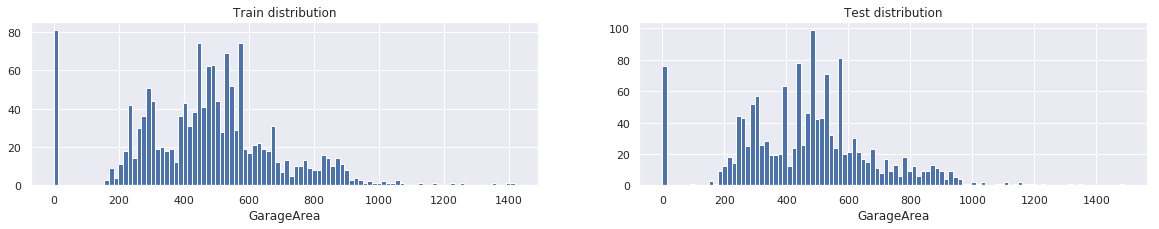

In [102]:
plot_histogram_train_test('GarageArea')

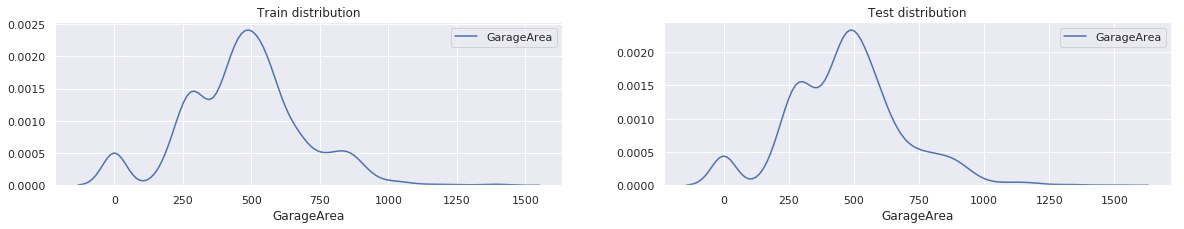

In [103]:
plot_kde_train_test('GarageArea')

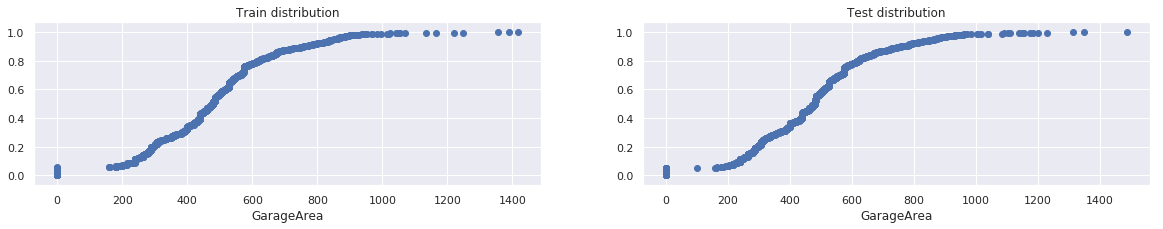

In [104]:
plot_ecdf_train_test('GarageArea')

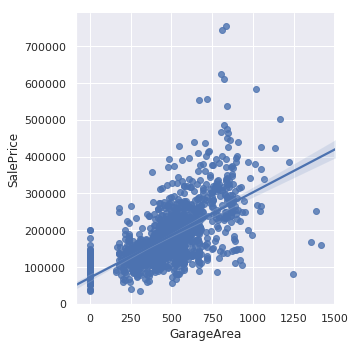

In [105]:
sns.lmplot('GarageArea', 'SalePrice', train_df)

## 1.15. WoodDeckSF:
- Wood deck area in square feet

In [106]:
train_df.WoodDeckSF.dtype

dtype('int64')

In [107]:
checknull('WoodDeckSF')

Portion of null values in train and test respectively: 0.0 , 0.0


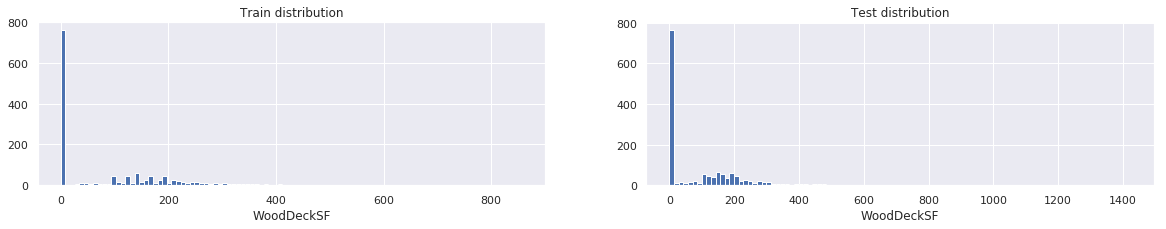

In [108]:
plot_histogram_train_test('WoodDeckSF')

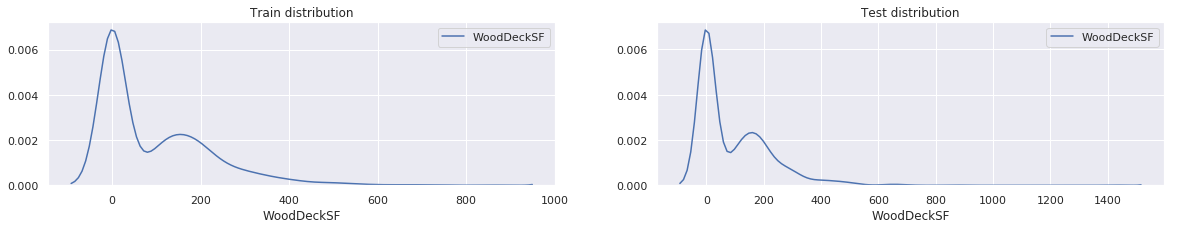

In [109]:
plot_kde_train_test('WoodDeckSF')

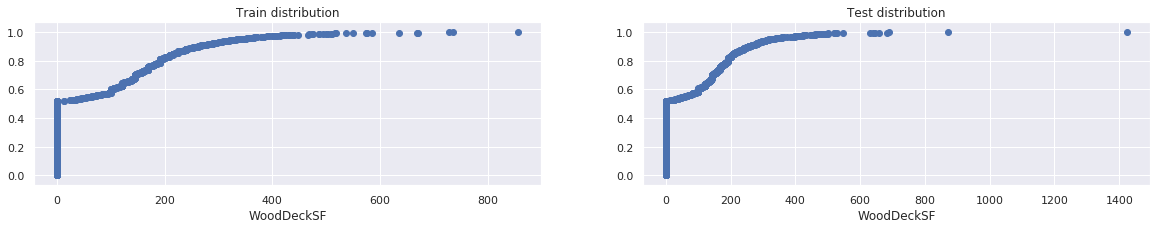

In [110]:
plot_ecdf_train_test('WoodDeckSF')

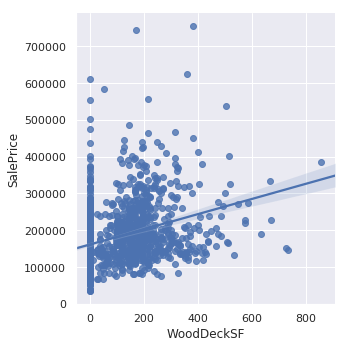

In [111]:
sns.lmplot('WoodDeckSF', 'SalePrice', train_df)

## 1.16. OpenPorchSF:
- Open porch area in square feet

In [112]:
train_df.OpenPorchSF.dtype

dtype('int64')

In [113]:
checknull('OpenPorchSF')

Portion of null values in train and test respectively: 0.0 , 0.0


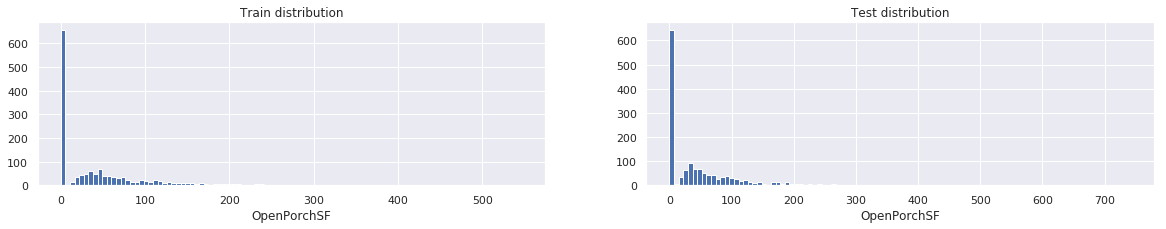

In [114]:
plot_histogram_train_test('OpenPorchSF')

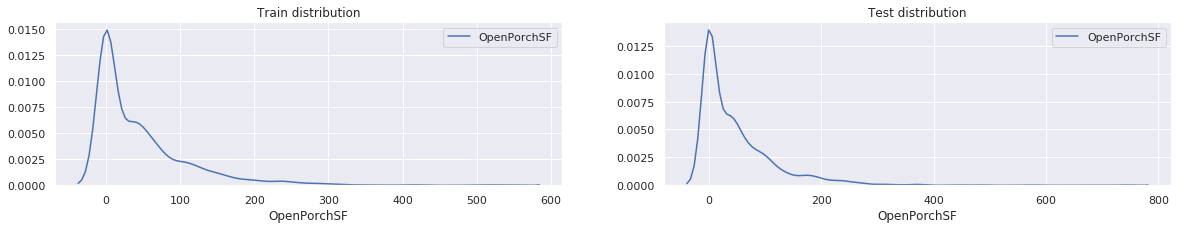

In [115]:
plot_kde_train_test('OpenPorchSF')

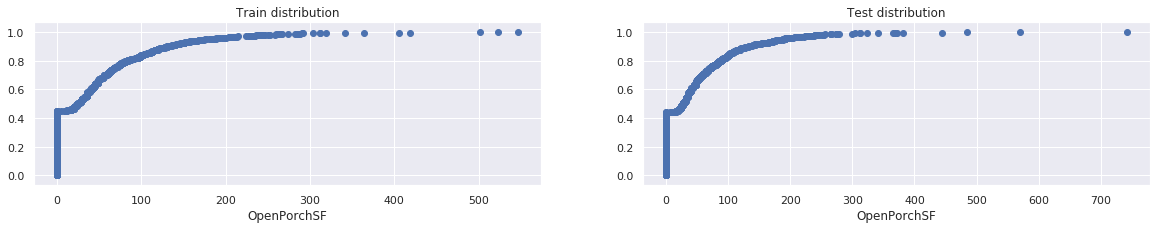

In [116]:
plot_ecdf_train_test('OpenPorchSF')

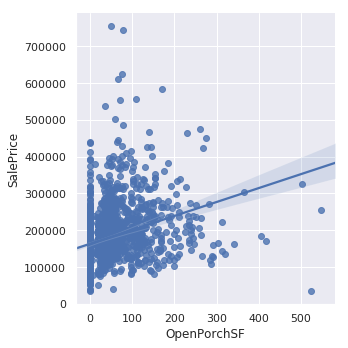

In [117]:
sns.lmplot('OpenPorchSF', 'SalePrice', train_df)

# 2. Training

In [118]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

In [119]:
combine = [train_df, test_df]

In [120]:
feature_cols = ['LotFrontage', 'OverallQual', 'YearBuilt',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea']

In [121]:
train_df = train_df[feature_cols+['SalePrice']]
test_df = test_df[feature_cols]

In [122]:
# Impute columns with missing value
for col in feature_cols:
    feature_most_frequent_value_train = train_df[col].mode().values[0]
    train_df[col] = train_df[col].fillna(feature_most_frequent_value_train)
    test_df[col] = test_df[col].fillna(feature_most_frequent_value_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [123]:
labels = train_df['SalePrice']
data = train_df.drop('SalePrice', axis=1)

mean_vec = np.mean(data, axis=0)
std_vec = np.std(data, axis=0)

data = (data - mean_vec) / std_vec

test_data = (test_df-mean_vec)/std_vec

In [124]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   train_df['SalePrice'],
                                                   test_size=0.2,
                                                   random_state=123)

In [125]:
# params = {'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

# grid = GridSearchCV(param_grid=params, estimator=LogisticRegression(multi_class='auto', solver='lbfgs'), cv=5, n_jobs=-1)

In [126]:
# grid.fit(X_train, y_train)

In [127]:
lr = LogisticRegression(multi_class='auto', solver='lbfgs')
# lr.fit(X_train, y_train)

In [128]:
dt = DecisionTreeRegressor(max_depth=9, min_samples_leaf=20)
# dt.fit(X_train, y_train)

In [129]:
rf = RandomForestRegressor(n_estimators=50, max_depth=9 ,min_samples_leaf=5)
# rf.fit(X_train, y_train)

In [130]:
gb = GradientBoostingRegressor(n_estimators=80)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=80,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [131]:
y_pred_train = gb.predict(X_train)
mean_squared_log_error(y_train, y_pred_train)**.5

0.12745715472296223

In [132]:
y_pred_val = gb.predict(X_test)
mean_squared_log_error(y_test, y_pred_val)**.5

0.13839725763420874

In [133]:
gb.fit(np.vstack([X_train, X_test]), np.concatenate([y_train, y_test]))
y_pred_test = gb.predict(test_data)

In [134]:
submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [135]:
submission['SalePrice'] = y_pred_test

In [136]:
submission.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [137]:
submission.head()

,Id,SalePrice
0,1461,126765.128205
1,1462,144027.092907
2,1463,164833.617439
3,1464,180364.732438
4,1465,215380.161653
